In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from functions_albert import gini

In [2]:
#display options
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', None)  # or 199
data = pd.read_excel("UNPS_1112_PS2.xls")
percentiles = [0.05,0.1,0.25,0.5,0.75,0.9,0.95]

## Exercise 1

In [3]:
# Part a
boolean = data['hhid'].duplicated().any()
# boolean that gives true if there are any repeated hhid values and false otherwise

if boolean == True:
    print("There is at least one duplicate value of hhid.")
else:
    print("All hhid's are unique.")

hhid_column_index = data.columns.get_loc('hhid')
hhid_count = data.count()[hhid_column_index]
print(f"The number of observations in the data set are {hhid_count}, as this is the number of unique household ids.")


All hhid's are unique.
The number of observations in the data set are 2613, as this is the number of unique household ids.


In [4]:
# Part b
interested_variables = ['head_gender', 'head_age', 'familysize', 'consumption', 'income', 'wealth']
data_interested_variables = data[interested_variables].describe(percentiles=percentiles)
data_interested_variables = data_interested_variables.rename(
    {'consumption':'Consumption','head_age':'Head Age','familysize':'Family-size','head_gender':'Head Gender',\
     'income':'Income','wealth':'Wealth'}, axis='columns')
data_interested_variables

,Head Gender,Head Age,Family-size,Consumption,Income,Wealth
count,"2,597.00","2,597.00","2,597.00","2,613.00","2,613.00","2,613.00"
mean,1.31,46.07,7.48,"1,803.79","1,860.08","4,912.70"
std,0.46,15.07,3.71,"1,308.74","2,607.52","8,359.89"
min,1.00,14.00,1.00,250.31,27.49,0.00
5%,1.00,25.00,2.00,491.21,139.81,68.94
10%,1.00,28.00,3.00,604.29,212.14,165.15
25%,1.00,34.00,5.00,918.32,471.20,720.02
50%,1.00,44.00,7.00,"1,426.61","1,061.19","2,108.60"
75%,2.00,56.00,9.00,"2,296.86","2,234.80","5,221.94"
90%,2.00,68.40,12.00,"3,470.91","4,223.74","11,837.65"


In [5]:
for variable in interested_variables:
    missing_variable = data[variable].isna().sum()
    print(f"{variable} has {missing_variable} missing variables.")

head_gender has 16 missing variables.
head_age has 16 missing variables.
familysize has 16 missing variables.
consumption has 0 missing variables.
income has 0 missing variables.
wealth has 0 missing variables.


It appears that we have a full data set on data and consumption income and wealth, however we are missing 16 observations about gender, age and family size. There appear to be some outliers espicially at the high end of income, and the minimum of wealth being 0.

In [6]:
# Part c
# Where we have been careful to drop the missing observations as this will affect the proportion
data['dummy_head_gender'] = 1*(data['head_gender'].dropna()==2)
# Where taking the mean equates to the proportion count as female is counted as 1 and male as 0
women_proportion = data['dummy_head_gender'].mean()
print(f"The proportion of households where the head is female is {round(women_proportion, 3)} or \
{round(women_proportion, 3)*100}%.")

The proportion of households where the head is female is 0.314 or 31.4%.


In [7]:
# Part d
interested_variables = ['consumption', 'familysize', 'head_age', 'dummy_head_gender']
# Again we drop any missing variables
grouped_data = data[interested_variables].dropna().groupby(by='dummy_head_gender').mean()

male_data = [grouped_data['consumption'][0], grouped_data['familysize'][0], grouped_data['head_age'][0]]
female_data = [grouped_data['consumption'][1], grouped_data['familysize'][1], grouped_data['head_age'][1]]
gender_data = pd.DataFrame([male_data, female_data], columns = ['Consumption', 'Family-size', 'Head Age'],\
                    index = ['Male', 'Female'])
gender_data

,Consumption,Family-size,Head Age
Male,"1,898.30",7.72,44.39
Female,"1,593.26",6.96,49.73


This suggests there is a difference between the head of the household being male or female. Where 0 represents male and 1 represents female. When the head of the household is male the average consumption is greater by 306, which is relatively large compared to the size of the average of consumption. Also the average family size is larger by 0.76 when the head is male, additionally the head age is 5.34 years older when the head is female.  

## Exercise 2

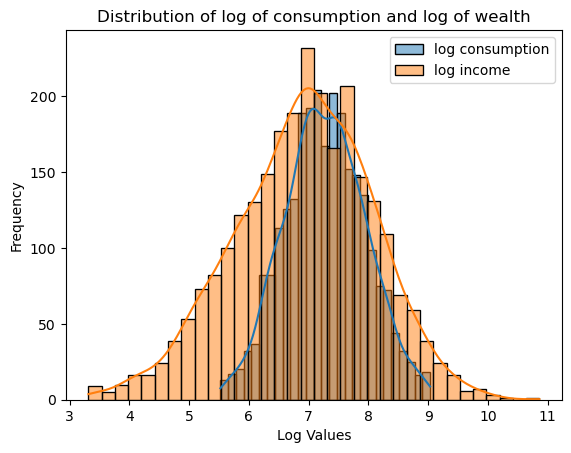

In [8]:
# Part a
# Calculate the log of the variable, handle zero values by replacing them with NaN and then dropping NaN
data['log_c'] = np.log(data['consumption'].replace([0], np.nan).dropna())
data['log_inc'] = np.log(data['income'].replace([0], np.nan).dropna())
data['log_w'] = np.log(data['wealth'].replace([0], np.nan).dropna())

# Plotting in a histogram
sns.histplot(data['log_c'], kde=True, label='log consumption')
sns.histplot(data['log_inc'], kde=True, label='log income')

plt.title('Distribution of log of consumption and log of wealth')
plt.xlabel('Log Values')
plt.ylabel('Frequency')
plt.legend()

plt.show()

The distributions look like they represent Gaussian distributions about log(7). Inequality is higher in income, this can be seen as it has more of a left tail and right tail then consumption.

In [9]:
# Part b
# Using the built in variance function in numpy
variance_log_c = np.var(data['log_c'])
variance_log_inc = np.var(data['log_inc'])
variance_log_w = np.nanvar(data['log_w'])
ugandan_log_var = [variance_log_c, variance_log_inc, variance_log_w]
us_log_var = [0.79, 0.97, 2.11]
print(f"For Uganda the variance of log of consumption is {round(variance_log_c, 2)}, the variance of log of income is \
{round(variance_log_inc, 2)} and the variance of log of wealth is {round(variance_log_w, 2)}. However, for the USA the variance\
 of log of consumption is 0.79, the variance of log of income is 0.97 and the variance of log of wealth is 2.11. This means \
 that we suggest there is more inequality in the USA for consumption, however Uganda has higher levels of inequality of income \
 and wealth. Here we have interpreted a large variance of log as leading to greater levels of inequality.")


variances = pd.DataFrame([ugandan_log_var, us_log_var], columns=['Variance of log consumption', 'Variance of log income',\
                                                                 'Variance of log wealth'], index=['Uganda','USA'])
variances

For Uganda the variance of log of consumption is 0.45, the variance of log of income is 1.34 and the variance of log of wealth is 2.68. However, for the USA the variance of log of consumption is 0.79, the variance of log of income is 0.97 and the variance of log of wealth is 2.11. This means  that we suggest there is more inequality in the USA for consumption, however Uganda has higher levels of inequality of income  and wealth. Here we have interpreted a large variance of log as leading to greater levels of inequality.


,Variance of log consumption,Variance of log income,Variance of log wealth
Uganda,0.45,1.34,2.68
USA,0.79,0.97,2.11


In [10]:
# Part c
interested_variables = ['consumption', 'income', 'wealth', 'urban']
data['wealth'] = data['wealth'].replace([0], np.nan).dropna()
grouped_data = data[interested_variables].groupby(by='urban').mean()

rural_data = [grouped_data['consumption'][0], grouped_data['income'][0], grouped_data['wealth'][0]]
urban_data = [grouped_data['consumption'][1], grouped_data['income'][1], grouped_data['wealth'][1]]
urban = pd.DataFrame([urban_data, rural_data], columns = ['Consumption', 'Income', 'Wealth'],\
                    index = ['Urban', 'Rural'])
urban

,Consumption,Income,Wealth
Urban,"2,544.22","2,480.62","6,711.02"
Rural,"1,629.45","1,713.96","4,533.86"


In [11]:
# Calculate ratio of means for each variable between Urban and Rural
ratios = urban.loc['Urban']/urban.loc['Rural']
ratios

Consumption   1.56
Income        1.45
Wealth        1.48
dtype: float64

From the table we can see that the ratio Urban/Rural for consumption, income and wealth is around 1.5.

In [12]:
# Part d
# Creating an new column that only contains data point of urban so then we can sort by whether the observation is in this column
urban_mask = data['urban'].dropna() == 1  

# Calculating variances for urban and non-urban areas separately
variance_urban_log_c = round(data.loc[urban_mask, 'log_c'].var(), 2)
variance_urban_log_inc = round(data.loc[urban_mask, 'log_inc'].var(), 2)
variance_urban_log_w = round(data.loc[urban_mask, 'log_w'].var(), 2)

variance_rural_log_c = round(data.loc[~urban_mask, 'log_c'].var(), 2)
variance_rural_log_inc = round(data.loc[~urban_mask, 'log_inc'].var(), 2)
variance_rural_log_w = round(data.loc[~urban_mask, 'log_w'].var(), 2)

# Print or use the results as needed
print(f"Variance of log consumption for urban areas is {variance_urban_log_c}, the variance of log income for urban areas \
is {variance_urban_log_inc} and the variance of log wealth for urban areas {variance_urban_log_w}.")
print(f"Variance of log consumption for rural areas is {variance_rural_log_c}, the variance of log income for rural \
areas is {variance_rural_log_inc} and the variance of log wealth for rural areas is {variance_rural_log_w}.")


Variance of log consumption for urban areas is 0.44, the variance of log income for urban areas is 1.11 and the variance of log wealth for urban areas 3.92.
Variance of log consumption for rural areas is 0.41, the variance of log income for rural areas is 1.34 and the variance of log wealth for rural areas is 2.39.


In [13]:
urban_var = [variance_urban_log_c, variance_urban_log_inc, variance_urban_log_w]
rural_var = [variance_rural_log_c, variance_rural_log_inc, variance_rural_log_w]
variances = pd.DataFrame([urban_var, rural_var], columns =['Variance of log consumption', 'Variance of log income',\
                                                               'Variance of log wealth'], index=['Urban','Rural'])
variances

,Variance of log consumption,Variance of log income,Variance of log wealth
Urban,0.44,1.11,3.92
Rural,0.41,1.34,2.39


In [14]:
# Part e
# We use the gini function which has been imported from the alberts_functions folder

usa_gini_values = [0.41, 0.44, 0.79]
interested_variables = ['consumption', 'income', 'wealth']

# The gini function does not work with a nan input so we make sure to drop the nan input
uganda_gini_values = []
for i, variable in enumerate(interested_variables):
    gini_variable = round(gini(data[variable].dropna()), 2)
    uganda_gini_values.append(gini_variable)
    print(f"The Ugandan Gini variable for {variable} is {gini_variable}, while the USA Gini variable for {variable} is \
{usa_gini_values[i]}.")

The Ugandan Gini variable for consumption is 0.37, while the USA Gini variable for consumption is 0.41.
The Ugandan Gini variable for income is 0.56, while the USA Gini variable for income is 0.44.
The Ugandan Gini variable for wealth is 0.65, while the USA Gini variable for wealth is 0.79.


In [15]:
gini = pd.DataFrame([uganda_gini_values, usa_gini_values], columns = ['Gini coefficient in consumption', \
                                                                      'Gini coefficient in income', \
                                                                      'Gini coefficient in wealth'], index = ['Uganda', 'USA'])
gini

,Gini coefficient in consumption,Gini coefficient in income,Gini coefficient in wealth
Uganda,0.37,0.56,0.65
USA,0.41,0.44,0.79


In [16]:
# Part f

# Calculating the total wealth
total_wealth = data['wealth'].sum()

# Calculate the cumulative percentage of wealth for each percentile
data['wealth_percentile'] = data['wealth'].dropna().rank(pct=True)

bottom_50_percent_share = round(data[data['wealth_percentile'] <= 0.5]['wealth'].sum() / total_wealth, 4)
top_10_percent_share = round(data[data['wealth_percentile'] > 0.9]['wealth'].sum() / total_wealth, 4)
top_5_percent_share = round(data[data['wealth_percentile'] > 0.95]['wealth'].sum() / total_wealth, 4)
top_1_percent_share = round(data[data['wealth_percentile'] > 0.99]['wealth'].sum() / total_wealth, 4)

print(f"Share of wealth held by the bottom 50% is {bottom_50_percent_share*100}%.")
print(f"Share of wealth held by the top 10% is {top_10_percent_share*100}%.")
print(f"Share of wealth held by the top 5% is {top_5_percent_share*100}%.")
print(f"Share of wealth held by the top 1% {top_1_percent_share*100}%.")


Share of wealth held by the bottom 50% is 8.34%.
Share of wealth held by the top 10% is 50.92%.
Share of wealth held by the top 5% is 35.089999999999996%.
Share of wealth held by the top 1% 11.559999999999999%.


Part g

From this exercise we can see that the debate on inequality should not be limited to developed countries. We have seen that inequality across Uganda is just as an important issue as inequality across the USA. This can be seen as the gini coefficient in income for Uganda is greater than the USA indicating higher inequality. Additionally, for Uganda the variances of income and wealth are higher than in the USA.

Part h

Consumption data can enjoy from greater accesibility and transparency. Where income is not well documented, consumption can shed light on non-standard/informal income flows. There are, however, a few possible drawbacks in using consumption as a meaure of inequality. Consumption can differ from income if individuals borrow or save. As a consequence, the observations might be distorted depending on access to credit. This can be seen in our data of Uganda where income and consumption are not the same. Additionally, measurements of consumption can differ depending on the value people attach to goods, services and leisure. Consumption alone can also be misleading as it might not capture accumulation of wealth in certain cases. If data is available for both consumption and income, it is good pratice to apply both measurements in synergy so that each can highligh anomalies or confer credibility to the pattern of the other.

## Exercise 3

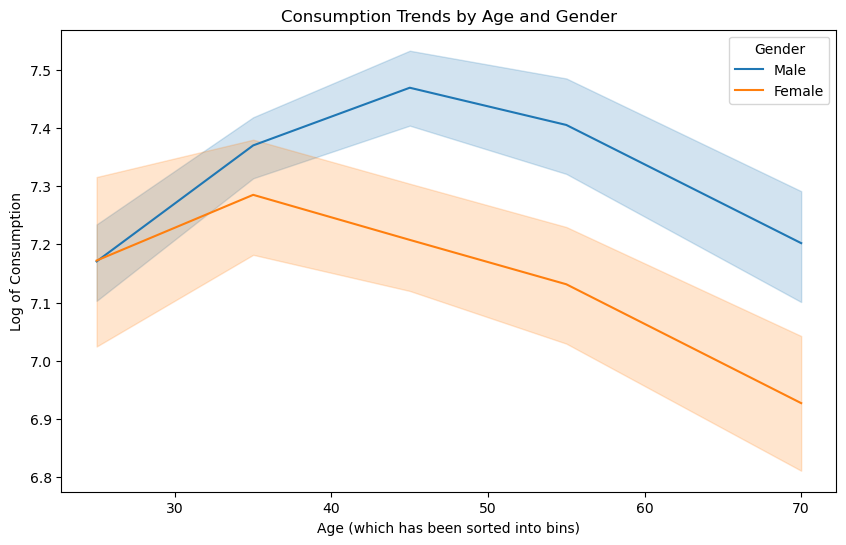

In [17]:
# Part a
# Following the instructions of dropping ages below 18 and above 80 and grouping the ages in bins
# Additionally taking care to remove any of the missing data
data = data.dropna(subset=['head_age'])
data = data[(data['head_age'] >= 18) & (data['head_age'] <= 80)]

data['Gender'] = np.where(data['head_gender'].dropna()==2, 'Female', 'Male')

bins = [18, 30, 40, 50, 60, 80]
labels = [25, 35, 45, 55, 70]
data['age_bins'] = pd.cut(data['head_age'].dropna(),bins=bins, labels=labels)

fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(x='age_bins', y='log_c', hue='Gender', data=data, ax=ax)

ax.set_xlabel('Age (which has been sorted into bins)')
ax.set_ylabel('Log of Consumption')
ax.set_title('Consumption Trends by Age and Gender')
plt.show()


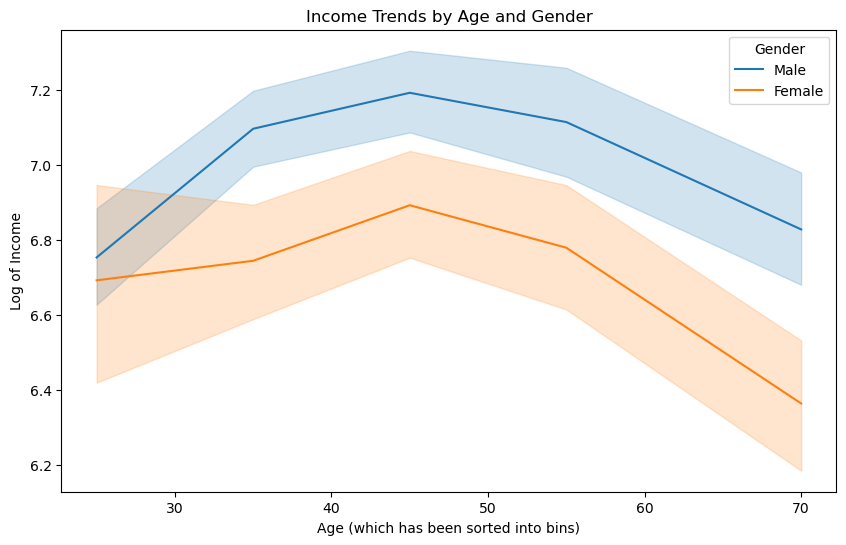

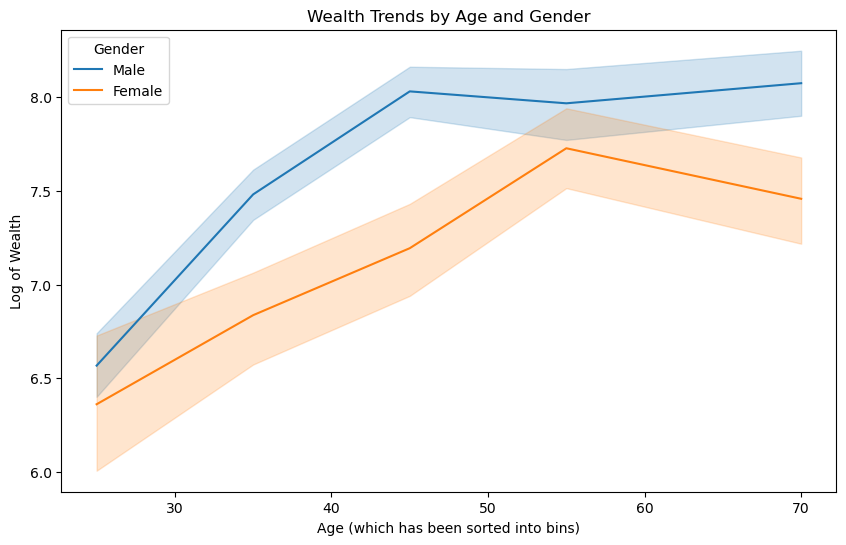

In [18]:
# Part b
# For log income
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(x='age_bins', y='log_inc', hue='Gender', data=data, ax=ax)

ax.set_xlabel('Age (which has been sorted into bins)')
ax.set_ylabel('Log of Income')
ax.set_title('Income Trends by Age and Gender')
plt.show()

# For log wealth
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(x='age_bins', y='log_w', hue='Gender', data=data, ax=ax)

ax.set_xlabel('Age (which has been sorted into bins)')
ax.set_ylabel('Log of Wealth')
ax.set_title('Wealth Trends by Age and Gender')
plt.show()

Part c

The differences in the lifecycle trend for consumption by gender is we can see that males are expected to have greater income across all age groups. Female consumption is increasing until 35 then consumption decreases, however for males consumption is increasing until 45 then it is decreasing. For both genders the biggest deceases in consumption is after the age of 55.
Looking at the lifecycle for income again at all ages income of males is greater than income of females, and the lines follow the same pattern as consumption. Again males have a greater wealth across all ages than females. However, for both genders wealth is increasing until 55 then plateaus. 